In [1]:
import pandas as pd
import sys
import os
sys.path.append('../')
from prompt.visualization_prompt import get_visualization_prompt
from claude_viz import call_claude
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
csv_file = 'Delinquency_prediction_dataset.csv'
df = pd.read_csv(csv_file)
print(f"Data shape: {df.shape}")
df.head()

Data shape: (500, 19)


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
# Call Claude via AWS Bedrock
from bedrock_claude import call_bedrock_claude

# Prepare data summary
data_summary = f"""
Data Overview:
{df.describe()}

Sample Data:
{df.head()}
"""

In [4]:
data_context = f"Dataset with {df.shape[0]} rows and {df.shape[1]} columns. Columns: {list(df.columns)}"


Nova's Generated Code:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data visualizations

plt.figure(figsize=(12, 8))

# 1. Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Income vs. Credit Score
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Income', y='Credit_Score', hue='Delinquent_Account', palette='coolwarm', alpha=0.6)
plt.title('Income vs. Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')

# 3. Loan Balance vs. Debt-to-Income Ratio
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Loan_Balance', y='Debt_to_Income_Ratio', hue='Employment_Status', palette='Set2', alpha=0.6)
plt.title('Loan Balance vs. Debt-to-Income Ratio')
plt.xlabel('Loan Balance')
plt.ylabel('Debt-to-Income Ratio')

# Adjust layout and show plots
plt.tight_layout()
plt.show()
```


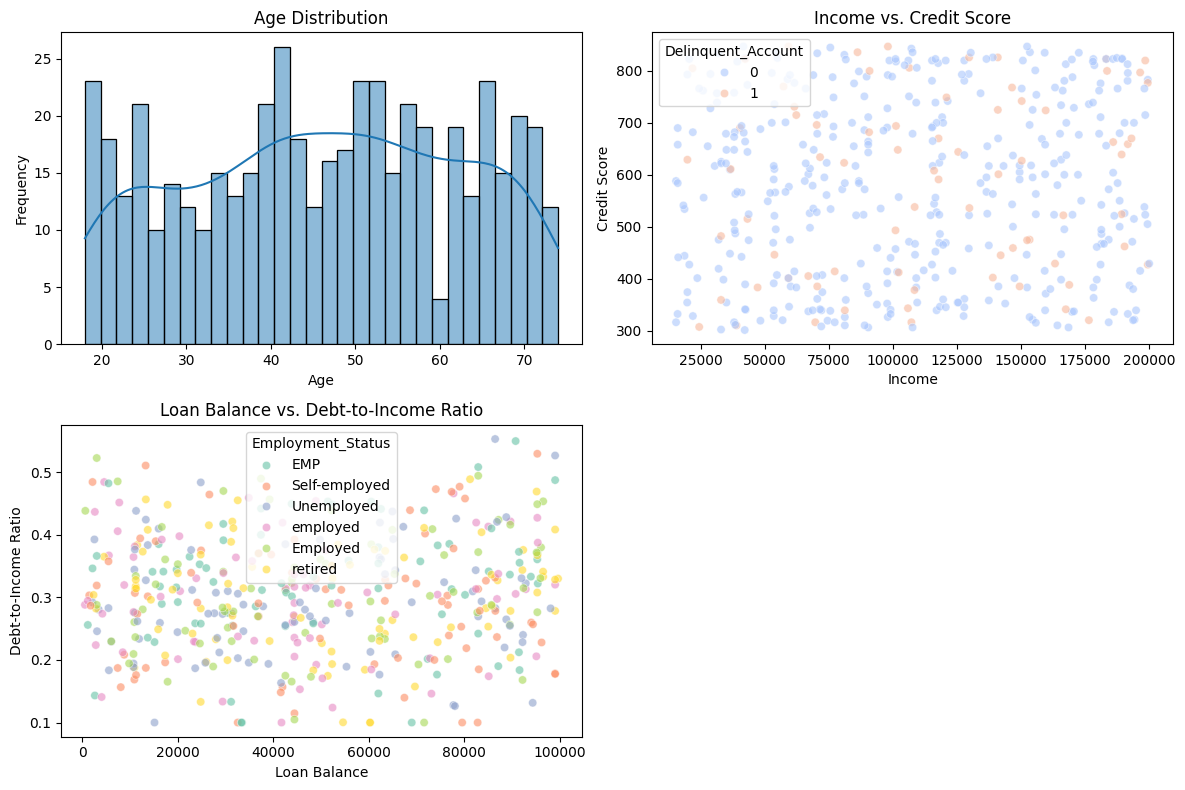

In [5]:
# Call Nova Lite via AWS Bedrock
from bedrock_nova import call_bedrock_nova
from code_gen_prompt import get_code_generation_prompt

# Get code generation prompt
code_prompt = get_code_generation_prompt(data_context)

# Get Nova's code
code_response = call_bedrock_nova(code_prompt, data_summary)
print("Nova's Generated Code:")
print(code_response)

# Execute the generated code
exec(code_response.split('```python')[1].split('```')[0])


In [6]:

# Get code generation prompt
from code_gen_prompt import get_code_generation_prompt

code_prompt = get_code_generation_prompt(data_context)

# Get Claude's code via Bedrock
from bedrock_claude import call_bedrock_claude
code_response = call_bedrock_claude(code_prompt, data_summary)

print("Claude's Generated Code:")
print(code_response)

# Execute the generated code
exec(code_response.split('```python')[1].split('```')[0])


AccessDeniedException: An error occurred (AccessDeniedException) when calling the InvokeModel operation: Model access is denied due to IAM user or service role is not authorized to perform the required AWS Marketplace actions (aws-marketplace:ViewSubscriptions, aws-marketplace:Subscribe) to enable access to this model. Refer to the Amazon Bedrock documentation for further details. Your AWS Marketplace subscription for this model cannot be completed at this time. If you recently fixed this issue, try again after 15 minutes.

In [ ]:
# Get visualization prompt
data_context = f"Dataset with {df.shape[0]} rows and {df.shape[1]} columns. Columns: {list(df.columns)}"
viz_prompt = get_visualization_prompt(data_context)
print("Visualization Expert Prompt:")
print(viz_prompt[:500] + "...")

NameError: name 'df' is not defined

In [ ]:
# Call Claude via AWS Bedrock
from bedrock_claude import call_bedrock_claude

# Prepare data summary
data_summary = f"""
Data Overview:
{df.describe()}

Sample Data:
{df.head()}
"""

# Get Claude's recommendations via Bedrock
recommendations = call_bedrock_claude(viz_prompt, data_summary)
print("Claude's Visualization Recommendations:")
print(recommendations)


Claude's Visualization Recommendations:
Based on the provided dataset and the context, here are the recommended visualizations to analyze the data:

1. **Customer Age Distribution**:
   - Visualization Type: Histogram or Box Plot
   - Rationale: Understand the distribution of customer ages and identify any outliers or skewness in the data.

2. **Income Distribution**:
   - Visualization Type: Histogram or Box Plot
   - Rationale: Analyze the distribution of customer incomes to identify any patterns or segments.

3. **Credit Score vs. Income Scatterplot**:
   - Visualization Type: Scatterplot
   - Rationale: Explore the relationship between customer credit scores and their income levels.

4. **Credit Utilization vs. Debt-to-Income Ratio**:
   - Visualization Type: Heatmap or Scatterplot with Color Encoding
   - Rationale: Visualize the correlation between credit utilization and debt-to-income ratio, which can provide insights into customer financial health.

5. **Missed Payments and Del

In [ ]:
# Execute visualizations based on Claude's recommendations
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(12, 8))
    
    # Correlation heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    
    # Distribution of first numeric column
    plt.subplot(2, 2, 2)
    df[numeric_cols[0]].hist(bins=20)
    plt.title(f'Distribution of {numeric_cols[0]}')
    
    # Scatter plot if 2+ numeric columns
    if len(numeric_cols) >= 2:
        plt.subplot(2, 2, 3)
        plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]])
        plt.xlabel(numeric_cols[0])
        plt.ylabel(numeric_cols[1])
        plt.title('Scatter Plot')
    
    plt.tight_layout()
    plt.show()

print("\nVisualization complete - following Claude's expert recommendations")